# ECE563 - Machine Learning - Assignment 1

## PART I: Programming Questions
@author: Shyama Sastha Krishnamoorthy Srinivasan

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import idx2numpy
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
%matplotlib inline

## Q.1. Basic operations + Data visualization

Q.1.1. IRIS Dataset

In [2]:
# Reading in the IRIS dataset - Q.1.1.a.
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df.drop("Id", axis=1)

In [3]:
# Printing the column information - Q.1.1.b
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Printing column metrics
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width_cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length_cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width_cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


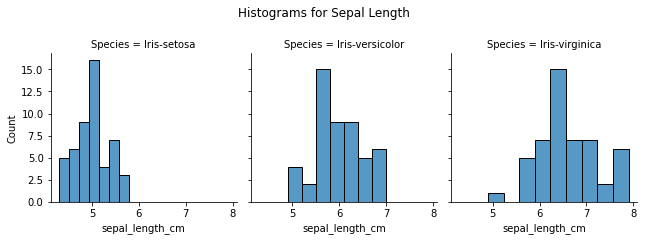

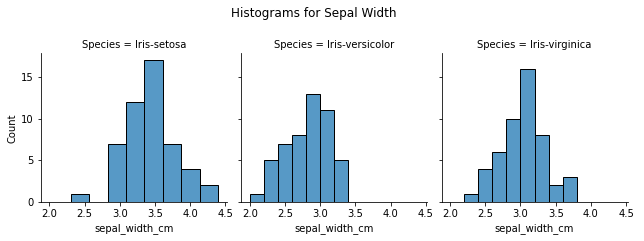

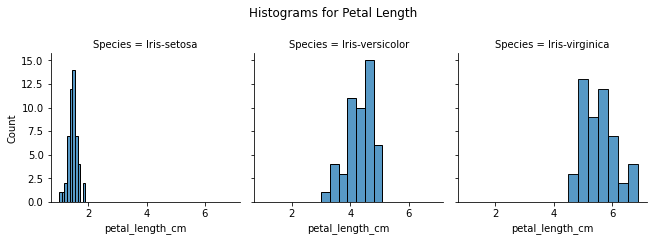

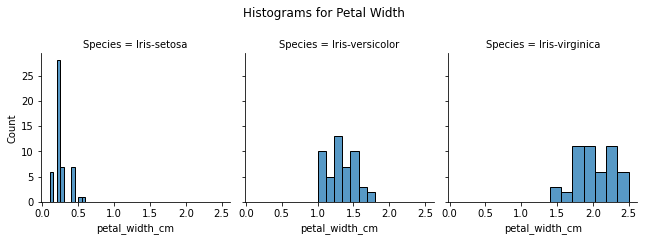

In [5]:
# Plotting histograms - Q.1.1.c

# Sepal length
sns.FacetGrid(iris_df, col="Species").map(sns.histplot,"sepal_length_cm").add_legend()
plt.suptitle("Histograms for Sepal Length", y=1.1)
plt.savefig("IRIS_Sepal_Length_Histograms.png", bbox_inches="tight")

# Sepal Width
sns.FacetGrid(iris_df, col="Species").map(sns.histplot,"sepal_width_cm").add_legend()
plt.suptitle("Histograms for Sepal Width", y=1.1)
plt.savefig("IRIS_Sepal_Width_Histograms.png", bbox_inches="tight")

# Petal Length
sns.FacetGrid(iris_df, col="Species").map(sns.histplot,"petal_length_cm").add_legend()
plt.suptitle("Histograms for Petal Length", y=1.1)
plt.savefig("IRIS_Petal_Length_Histograms.png", bbox_inches="tight")

# Petal Width
sns.FacetGrid(iris_df, col="Species").map(sns.histplot,"petal_width_cm").add_legend()
plt.suptitle("Histograms for Petal Width", y=1.1)
plt.savefig("IRIS_Petal_Width_Histograms.png", bbox_inches="tight")

C:\Users\Sastha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


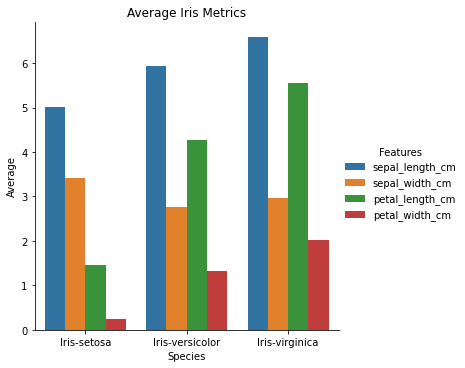

In [6]:
# Plotting Bar plot - Q.1.1.c

# Finding the average value of each Feature by Species
species_df = iris_df.groupby("Species")
mean_iris_df = species_df.mean()
mean_iris_df = mean_iris_df.reset_index()

mean_iris_df = pd.melt(mean_iris_df, id_vars="Species", var_name="Features", value_name="Average")
mean_iris_df

sns.factorplot(x='Species', y='Average', hue='Features', data=mean_iris_df, kind='bar')
plt.title("Average Iris Metrics")
plt.savefig("Average_Iris_Metrics.png", bbox_inches="tight")

Q.1.2. MNIST dataset

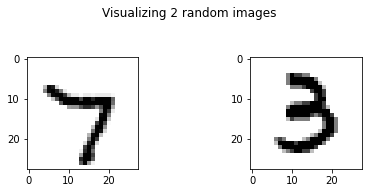

In [7]:
# loading the dataset using idx numpy - Q.1.2.a

#For reporducability
np.random.seed(42)

# Loading training data
mnist_train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
# reshaping into 1D array
mnist_train_reshaped = mnist_train_images.reshape(60000,784)
pixels = [ 'pixel'+str(i+1) for i in range(mnist_train_reshaped.shape[1]) ]
mnist_train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

mnist_train_df = pd.DataFrame(mnist_train_reshaped,columns=pixels)
mnist_train_df['y_train'] = mnist_train_labels
mnist_train_df['label'] = mnist_train_df['y_train'].apply(lambda i: str(i))

# Loading testing data
mnist_test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
# reshaping into 1D array
mnist_test_reshaped = mnist_test_images.reshape(10000,784)
mnist_test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

mnist_test_df = pd.DataFrame(mnist_test_reshaped,columns=pixels)
mnist_test_df['y_test'] = mnist_test_labels
mnist_test_df['label'] = mnist_test_df['y_test'].apply(lambda i: str(i))

# Visualizing two random images - Q.1.2.b
fig, axes = plt.subplots(1,2)
samples = mnist_train_images.shape[0]
picks = np.random.choice(samples, size=2, replace=False)
axes[0].imshow(mnist_train_images[picks[0]], cmap=plt.cm.binary)
axes[1].imshow(mnist_train_images[picks[1]], cmap=plt.cm.binary)
fig.subplots_adjust(wspace=1, top=1.1)
fig.suptitle("Visualizing 2 random images")
plt.savefig("Visualized_images.png", bbox_inches="tight")

[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.024s...
[t-SNE] Computed neighbors for 60000 samples in 109.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

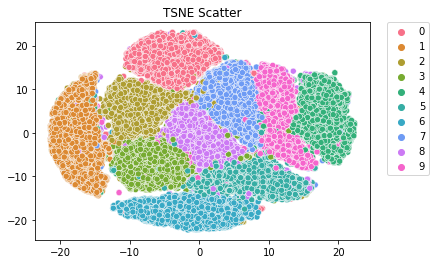

In [8]:
# Using TSNE to reduce dimensions to 2 and see how the fitting is- Q.1.2.c
X_train = mnist_train_df[pixels].values
y_train = mnist_train_labels
tsne = TSNE(n_components=2, perplexity=28, n_iter = 500, verbose=1, n_jobs=-1)
tsne_fit = tsne.fit_transform(X_train)
scatter = sns.scatterplot(x=tsne_fit[:,0],y=tsne_fit[:,1], hue=y_train, palette=sns.color_palette("husl", 10), legend="full")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("TSNE Scatter")
fig = scatter.get_figure()
fig.savefig("TSNE_Scatter.png", bbox_inches="tight")

After running the tSNE for 500 iterations on the entire dataset, it can be inferred that there is enough information for the separability of the labels even when the dimension is reduced to two.

## Q.2. Linear Regression

In [9]:
# Reading in the dataset
aba_df = pd.read_csv("abalone.csv")

# Getting info on the dataset
aba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
# Looking at the first 5 entires
aba_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
# Enconding the value of "Sex" to 0 1 values
aba_obj_df = pd.get_dummies(aba_df[['Sex']])

# Creating new dataframe after removing Sex and adding and reordering new columns
aba_df = aba_df.drop("Sex", axis=1)

# Adding the encoded Sex columns to the new dataframe
enc_aba_df = pd.concat([aba_df, aba_obj_df], axis=1)

# Giving the list of columns to reorder and reordering the dataframe
columns = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Sex_M", "Sex_F", "Sex_I", "Rings"]
enc_aba_df = enc_aba_df.reindex(columns=columns)

In [12]:
# Understanding how the continous values range by looking at some metrics
aba_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


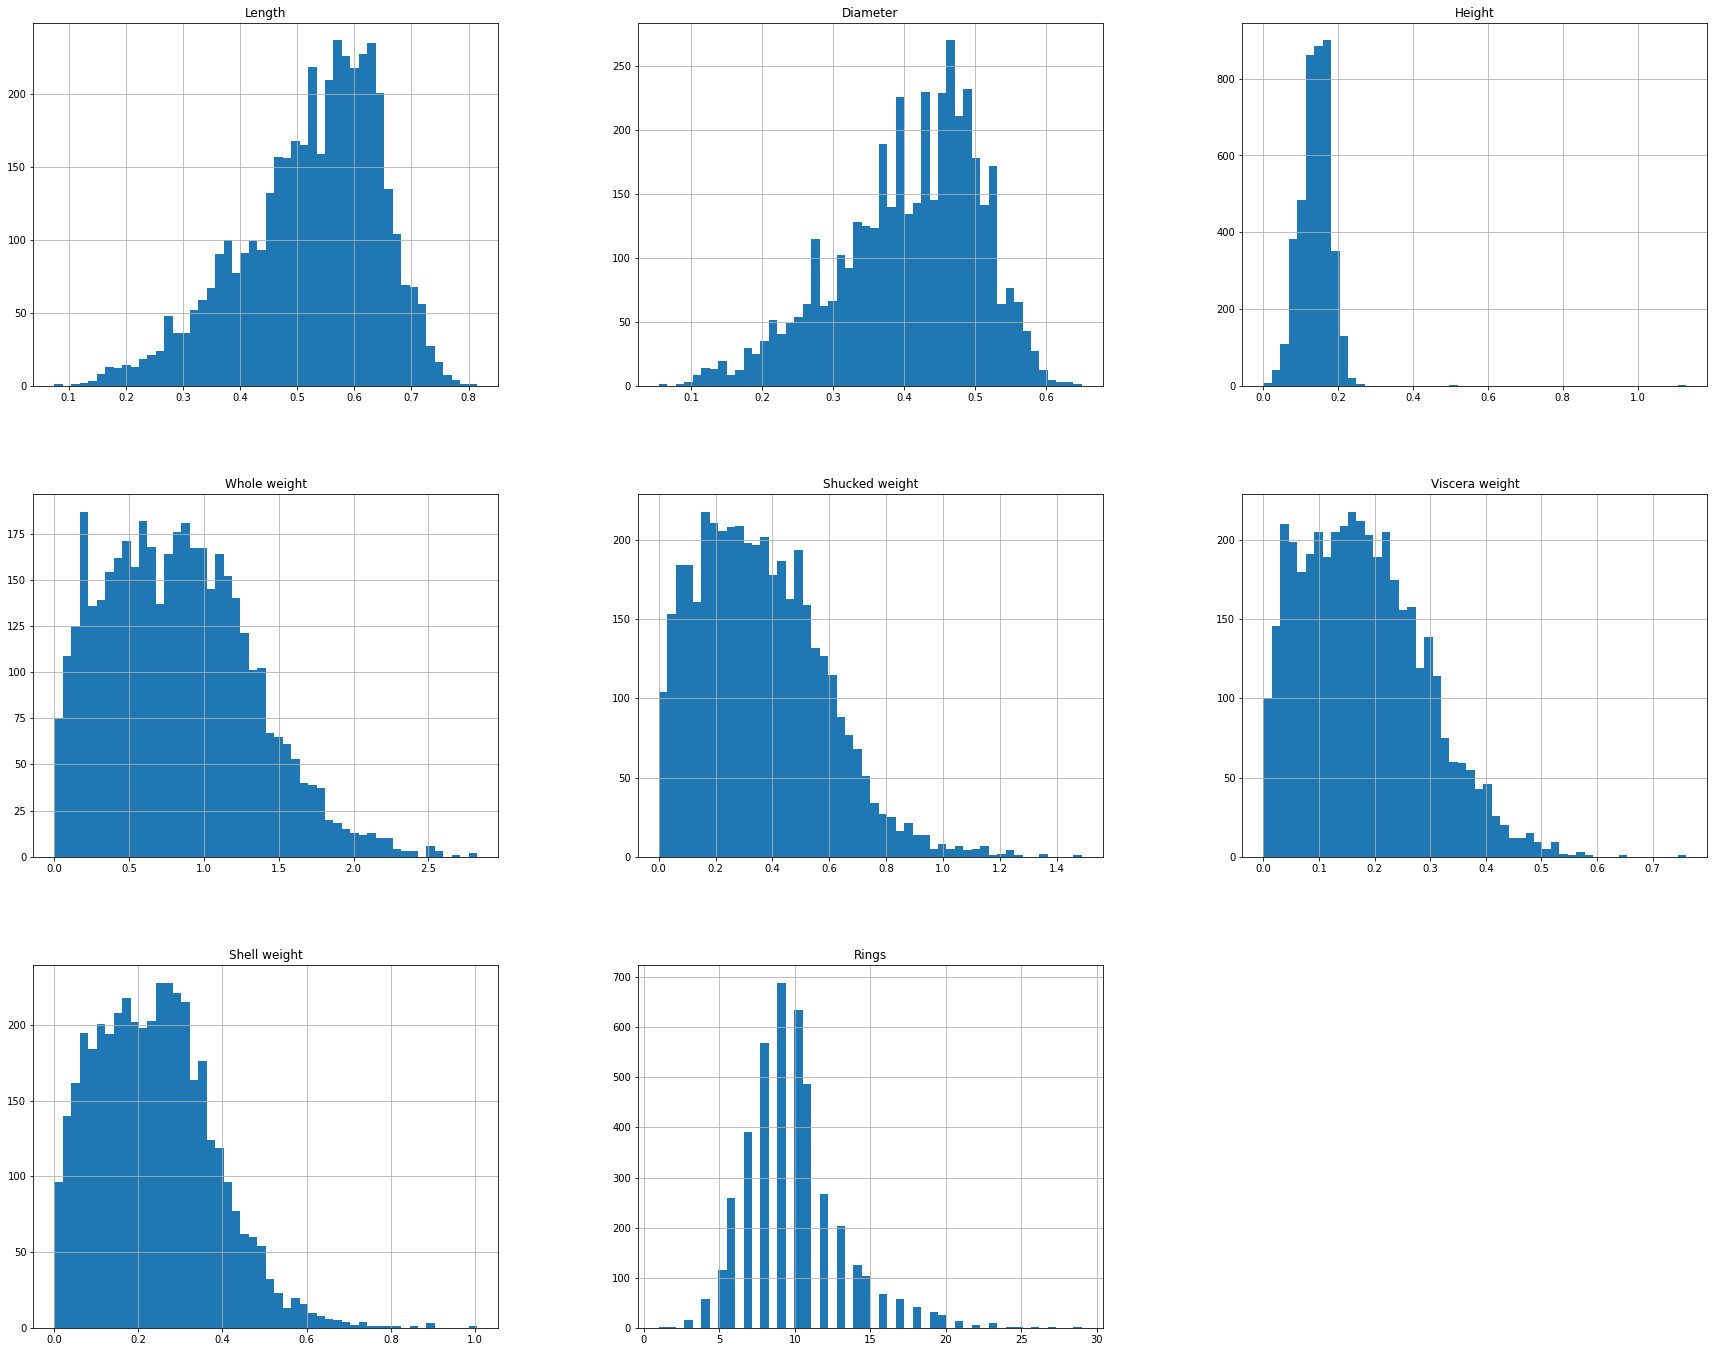

In [13]:
# Plotting the histograms for all the continous columns in the dataframe
aba_df.hist(bins=50, figsize=(30,24))
plt.savefig("Abalone_Histograms.png", bbox_inches="tight")

In [14]:
# Getting ready with the X and y datasets for train test splits
X = enc_aba_df.drop('Rings', axis=1)
y = enc_aba_df.iloc[:,-1].values

In [15]:
# Creating train test split to perform feature scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
# Listing out the columns to be transformed
numerical = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]

# Creating a feature set to perform numerical scaling with standard scaler
scale_feats = X_train[numerical]

# Creating the scaling operation on the numericals
scaler = StandardScaler().fit(scale_feats.values)
scale_feats = scaler.transform(scale_feats.values)

# Generating the transformed X_train
X_train[numerical] = scale_feats
x_train = np.array(X_train.iloc[:,:].values)

# Generating the transformed for X_test
scaled_feats = X_test[numerical]
scaled_feats = scaler.transform(scaled_feats.values)
X_test[numerical] = scaled_feats
x_test = np.array(X_test.iloc[:,:].values)

C:\Users\Sastha\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Sastha\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [17]:
# Creating a cost function - Takes the input array, output values, weights and bias
# The cost function can be obtained by doing (Sum(1/n * (z - y)^2))^1/2, where z is the predicted output
def CostFunction(x, y, w, b):
    cost = (np.sum((predict(x, w, b) - y) ** 2) / len(y))
    return cost

# Implementing the fitting with gradient descent
def fit(x, y, w, b, eta, epochs):
    costs = [0] * epochs
   
    for epoch in range(epochs):
        z = predict(x, w, b)
        l = z - y # The loss per epoch
        
        wg = (x.T.dot(l) / len(y)) # The weights gradient
        bg = np.sum(l) / len(y) # The bias gradient
        
        w = w - eta * wg
        b = b - eta * bg
  
        cost = CostFunction(x, y, w, b) ** 1/2 # Generating the cost per epoch
        costs[epoch] = cost # List of costs to keep track
        
        if ((epoch+1) % (epochs/10) == 0): # Displaying the cost of every n/10th epoch
            print("Cost of {}th epoch is: {}".format((epoch+1), cost))
        
    return w, b, costs

# Implementing function to predict the output using z = Sum(wx) + b
def predict(x, w, b):
    return x.dot(w) + b

In [18]:
# Implementing Kfold before performing gradient Descent and plotting - Q.2.1.a
kf = KFold(n_splits=5)
cost_tr_pdf = PdfPages('Cost vs Epochs Plots Training for Reg.pdf')
cost_val_pdf = PdfPages('Cost vs Epochs Plots Validation for Reg.pdf')
kn = 1
ws = []
bs  = []
cs = []
for train_index, test_index in kf.split(x_train):
    print("\nKfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    print("Training set: ")
    w, b, c = fit(X_tr, y_tr, np.zeros(X_tr.shape[1]), 0, 0.01, epochs=1000)
    plt.plot(c) # Plotting the cost vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epochs - Model {}".format(kn))
    plt.savefig(cost_tr_pdf, format='pdf')
    plt.clf()
    print("Validation set: ")
    w, b, c = fit(X_val, y_val, np.zeros(X_val.shape[1]), 0, 0.01, epochs=1000)
    print("RMSE = {}".format(c[-1]))
    ws.append(w)
    bs.append(b)
    cs.append(c[-1])
    plt.plot(c) # Plotting the cost vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epochs - Model {}".format(kn))
    plt.savefig(cost_val_pdf, format='pdf')
    plt.clf()
    kn += 1

cost_tr_pdf.close()
cost_val_pdf.close()


Kfold Iteration: 1
Train: 752 to 3758, Validate: 0 to 751
Training set: 
Cost of 100th epoch is: 6.65182219856225
Cost of 200th epoch is: 3.32001051591655
Cost of 300th epoch is: 2.965540099505459
Cost of 400th epoch is: 2.8471802478771915
Cost of 500th epoch is: 2.768115289053228
Cost of 600th epoch is: 2.7083143282766082
Cost of 700th epoch is: 2.6619963244436042
Cost of 800th epoch is: 2.6257194862901665
Cost of 900th epoch is: 2.5970770414598596
Cost of 1000th epoch is: 2.574314715141576
Validation set: 
Cost of 100th epoch is: 6.381184144537702
Cost of 200th epoch is: 3.07874684967102
Cost of 300th epoch is: 2.735838220607623
Cost of 400th epoch is: 2.6321143192837644
Cost of 500th epoch is: 2.568601589738854
Cost of 600th epoch is: 2.523599287659739
Cost of 700th epoch is: 2.490511027754688
Cost of 800th epoch is: 2.465602200631665
Cost of 900th epoch is: 2.446467475896721
Cost of 1000th epoch is: 2.431504603636387
RMSE = 2.431504603636387

Kfold Iteration: 2
Train: 0 to 3758, V

<Figure size 432x288 with 0 Axes>

In [19]:
# Printing the models and choosing the model with the best performance
print("The weights and biases of the 5 models are: \n")
i = 1
bc = 100 # choosing a large value to compare for RMSE to choose the best model
for (j,k,l) in zip(ws, bs, cs):
    bc = min(bc,l)
    index = i-1
    print("Model {}:".format(i))
    print("The weights are: {}".format(j))
    print("The bias is: {}".format(k))
    print("The RSME is : {}\n".format(l))
    i += 1
mod = [1, 2, 3, 4, 5]
plt.bar(mod, cs) # Plotting the cost vs Model
plt.xlabel("Kfold")
plt.ylabel("RMSE")
plt.title("RMSE vs Model")
plt.savefig("RMSE_vs_Model_Reg.png")
plt.clf()
bw = ws[index]
bb = bs[index]
print("The best model chosen out of the 5 models is:")
print("The weights are: {}".format(bw))
print("The bias is: {}".format(bb))
print("The RSME is : {}\n".format(bc))

The weights and biases of the 5 models are: 

Model 1:
The weights are: [ 0.18077001  0.72010342  0.60802095  0.28511031 -1.49222172 -0.42109995
  1.64448082  2.77262218  2.96346418  1.68419695]
The bias is: 7.420283299376419
The RSME is : 2.431504603636387

Model 2:
The weights are: [ 0.30621178  0.71458848  1.17919127  0.05789348 -1.77495244 -0.44162557
  1.77841768  2.69875066  2.6855596   2.01461771]
The bias is: 7.3989279646673625
The RSME is : 2.6723284044338995

Model 3:
The weights are: [ 0.26468614  0.36203742  1.35810509  0.21019957 -1.70651359 -0.57964547
  1.90989301  2.95346658  2.58892682  1.94041791]
The bias is: 7.482811302316923
The RSME is : 2.652730741352893

Model 4:
The weights are: [ 0.21586416  0.59316298  0.18152279  0.39450201 -2.02608463  0.01965009
  2.35970588  2.69011518  2.96186592  1.85198801]
The bias is: 7.5039691164505
The RSME is : 2.5174570744705034

Model 5:
The weights are: [ 2.96231760e-01  5.83299135e-01  1.22298151e+00 -2.13619858e-03
 -1.784050

<Figure size 432x288 with 0 Axes>

The best linear regression model has an RMSE of 2.1830157140702844.

In [20]:
# Implementing L1 or Lasso regression
def LassoFit(x, y, w, b, eta, epochs):
    costs = [0] * epochs
    lamda = 0.01 # Lasso Penality
    n, m = x.shape
   
    for epoch in range(epochs):
        z = predict(x, w, b)
        l = z - y # The loss per epoch
        l1_reg = (lamda) * np.linalg.norm(w)
        
        wg = (x.T.dot(l) / len(y)) + lamda * np.sign(w) # The weights gradient
        bg = np.sum(l) / len(y) # The bias gradient
        w = w - eta * wg
        b = b - eta * bg
  
        cost =  (CostFunction(x, y, w, b) + l1_reg) ** 1/2 # Generating the cost per epoch
        costs[epoch] = cost # List of costs to keep track
        
        if ((epoch+1) % (epochs/10) == 0): # Displaying the cost of every n/10th epoch
            print("Cost of {}th epoch is: {}".format((epoch+1), cost))
        
    return w, b, costs

In [21]:
# Implementing Kfold before performing Lasso regression and plotting - Q.2.1.b
kf = KFold(n_splits=5)
cost_tr_pdf = PdfPages('Cost vs Epochs Plots Training for Lasso Reg.pdf')
cost_val_pdf = PdfPages('Cost vs Epochs Plots Validation for Lasso Reg.pdf')
kn = 1
wsl1 = []
bsl1  = []
csl1 = []
for train_index, test_index in kf.split(x_train):
    print("\nKfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    print("Training set: ")
    w, b, c = LassoFit(X_tr, y_tr, np.zeros(X_tr.shape[1]), 0, 0.01, epochs=1000)
    plt.plot(c) # Plotting the cost vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epochs - Model {}".format(kn))
    plt.savefig(cost_tr_pdf, format='pdf')
    plt.clf()
    print("Validation set: ")
    w, b, c = LassoFit(X_val, y_val, np.zeros(X_val.shape[1]), 0, 0.01, epochs=1000)
    print("RMSE = {}".format(c[-1]))
    wsl1.append(w)
    bsl1.append(b)
    csl1.append(c[-1])
    plt.plot(c) # Plotting the cost vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epochs - Model {}".format(kn))
    plt.savefig(cost_val_pdf, format='pdf')
    plt.clf()
    kn += 1

cost_tr_pdf.close()
cost_val_pdf.close()


Kfold Iteration: 1
Train: 752 to 3758, Validate: 0 to 751
Training set: 
Cost of 100th epoch is: 6.68403364739248
Cost of 200th epoch is: 3.3519997265367496
Cost of 300th epoch is: 2.999120991858074
Cost of 400th epoch is: 2.8831381494116033
Cost of 500th epoch is: 2.8057529713802665
Cost of 600th epoch is: 2.7470077852595587
Cost of 700th epoch is: 2.7012887778390873
Cost of 800th epoch is: 2.6652974872984085
Cost of 900th epoch is: 2.636731916894677
Cost of 1000th epoch is: 2.6139115299027695
Validation set: 
Cost of 100th epoch is: 6.413582034589608
Cost of 200th epoch is: 3.110263184137382
Cost of 300th epoch is: 2.7688124031506787
Cost of 400th epoch is: 2.666525871106187
Cost of 500th epoch is: 2.603934440909914
Cost of 600th epoch is: 2.5594048945509997
Cost of 700th epoch is: 2.5264972432529706
Cost of 800th epoch is: 2.5015998297238147
Cost of 900th epoch is: 2.4823866664646768
Cost of 1000th epoch is: 2.4673029788514507
RMSE = 2.4673029788514507

Kfold Iteration: 2
Train: 0 

<Figure size 432x288 with 0 Axes>

In [22]:
# Printing the models and choosing the model with the best performance
print("The weights and biases of the 5 models are: \n")
i = 1
bc = np.Inf # choosing a large value to compare for RMSE to choose the best model
for (j,k,l) in zip(wsl1, bsl1, csl1):
    bc = min(bc,l)
    index = i-1
    print("Model {}:".format(i))
    print("The weights are: {}".format(j))
    print("The bias is: {}".format(k))
    print("The RSME is : {}\n".format(l))
    i += 1
mod = [1, 2, 3, 4, 5]
plt.bar(mod, csl1) # Plotting the cost vs Model
plt.xlabel("Kfold")
plt.ylabel("RMSE")
plt.title("RMSE vs Model")
plt.savefig("RMSE_vs_Model_LassoReg.png")
plt.clf()
bwl1 = ws[index]
bbl1 = bs[index]
print("The best model chosen out of the 5 models is:")
print("The weights are: {}".format(bw))
print("The bias is: {}".format(bb))
print("The RSME is : {}\n".format(bc))

The weights and biases of the 5 models are: 

Model 1:
The weights are: [ 0.15304762  0.69967869  0.59494818  0.21465762 -1.41679748 -0.34743991
  1.61857263  2.69909644  2.89298557  1.59745896]
The bias is: 7.489240970198825
The RSME is : 2.4673029788514507

Model 2:
The weights are: [ 2.75056452e-01  6.87936504e-01  1.15294015e+00  8.40720774e-05
 -1.68462950e+00 -3.69258413e-01  1.74964914e+00  2.62174190e+00
  2.61563581e+00  1.93187156e+00]
The bias is: 7.468949272132258
The RSME is : 2.7140044404680075

Model 3:
The weights are: [ 0.23939605  0.3411063   1.33771748  0.14149836 -1.62766236 -0.50734104
  1.88758741  2.87955555  2.51688542  1.85543483]
The bias is: 7.551575808439047
The RSME is : 2.6914950647942493

Model 4:
The weights are: [ 1.96486898e-01  5.76189104e-01  1.78267244e-01  3.49642739e-01
 -1.92046962e+00  9.92135306e-04  2.34846679e+00  2.61596269e+00
  2.89470727e+00  1.76367681e+00]
The bias is: 7.574046770647905
The RSME is : 2.5593014983934235

Model 5:
The wei

<Figure size 432x288 with 0 Axes>

After trial and error of around 3 hours, the best lasso parameter came out to be 0.01 with an RMSE of 2.2177746167864254.

In [23]:
# Implementing L2 or Ridge regression
def RidgeFit(x, y, w, b, eta, epochs):
    costs = [0] * epochs
    lamda = 0.01 # Ridge Penality
   
    for epoch in range(epochs):
        z = predict(x, w, b)
        l = z - y # The loss per epoch
        l2_reg = (lamda) * np.sum(w ** 2)
        
        wg = (x.T.dot(l) / len(y)) + lamda * (w ** 2) # The weights gradient
        bg = np.sum(l) / len(y) # The bias gradient
        w = w - eta * wg
        b = b - eta * bg
  
        cost =  (CostFunction(x, y, w, b) + l2_reg) ** 1/2
        costs[epoch] = cost # List of costs to keep track
        
        if ((epoch+1) % (epochs/10) == 0): # Displaying the cost of every n/10th epoch
            print("Cost of {}th epoch is: {}".format((epoch+1), cost))
        
    return w, b, costs

In [24]:
# Implementing Kfold before performing Ridge regression and plotting - Q.2.1.b
kf = KFold(n_splits=5)
cost_tr_pdf = PdfPages('Cost vs Epochs Plots Training for Ridge Reg.pdf')
cost_val_pdf = PdfPages('Cost vs Epochs Plots Validation for Ridge Reg.pdf')
kn = 1
wsl2 = []
bsl2  = []
csl2 = []
for train_index, test_index in kf.split(x_train):
    print("\nKfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    print("Training set: ")
    w, b, c = RidgeFit(X_tr, y_tr, np.zeros(X_tr.shape[1]), 0, 0.01, epochs=1000)
    plt.plot(c) # Plotting the cost vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epochs - Model {}".format(kn))
    plt.savefig(cost_tr_pdf, format='pdf')
    plt.clf()
    print("Validation set: ")
    w, b, c = RidgeFit(X_val, y_val, np.zeros(X_val.shape[1]), 0, 0.01, epochs=1000)
    print("RMSE = {}".format(c[-1]))
    wsl2.append(w)
    bsl2.append(b)
    csl2.append(c[-1])
    plt.plot(c) # Plotting the cost vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epochs - Model {}".format(kn))
    plt.savefig(cost_val_pdf, format='pdf')
    plt.clf()
    kn += 1

cost_tr_pdf.close()
cost_val_pdf.close()


Kfold Iteration: 1
Train: 752 to 3758, Validate: 0 to 751
Training set: 
Cost of 100th epoch is: 6.734234548670417
Cost of 200th epoch is: 3.42651950734393
Cost of 300th epoch is: 3.07087223583207
Cost of 400th epoch is: 2.952521642930078
Cost of 500th epoch is: 2.874857156776056
Cost of 600th epoch is: 2.8167243563622417
Cost of 700th epoch is: 2.7719421767581744
Cost of 800th epoch is: 2.736969484575503
Cost of 900th epoch is: 2.709389952084419
Cost of 1000th epoch is: 2.6874687451142893
Validation set: 
Cost of 100th epoch is: 6.461235659291166
Cost of 200th epoch is: 3.1835633656437667
Cost of 300th epoch is: 2.839974645050827
Cost of 400th epoch is: 2.7360700728942535
Cost of 500th epoch is: 2.6732383668812174
Cost of 600th epoch is: 2.628867655462483
Cost of 700th epoch is: 2.5961447834234592
Cost of 800th epoch is: 2.571368217446391
Cost of 900th epoch is: 2.552202925026454
Cost of 1000th epoch is: 2.5371022613933616
RMSE = 2.5371022613933616

Kfold Iteration: 2
Train: 0 to 375

<Figure size 432x288 with 0 Axes>

In [25]:
# Printing the models and choosing the model with the best performance
print("The weights and biases of the 5 models are: \n")
i = 1
bc = np.Inf # choosing a large value to compare for RMSE to choose the best model
for (j,k,l) in zip(wsl2, bsl2, csl2):
    bc = min(bc,l)
    index = i-1
    print("Model {}:".format(i))
    print("The weights are: {}".format(j))
    print("The bias is: {}".format(k))
    print("The RSME is : {}\n".format(l))
    i += 1
mod = [1, 2, 3, 4, 5]
plt.bar(mod, csl2) # Plotting the cost vs Model
plt.xlabel("Kfold")
plt.ylabel("RMSE")
plt.title("RMSE vs Model")
plt.savefig("RMSE_vs_Model_RidgeReg.png")
plt.clf()
bwl2 = ws[index]
bbl2 = bs[index]
print("The best model chosen out of the 5 models is:")
print("The weights are: {}".format(bw))
print("The bias is: {}".format(bb))
print("The RSME is : {}\n".format(bc))

The weights and biases of the 5 models are: 

Model 1:
The weights are: [ 0.21246941  0.73370554  0.62321774  0.33290922 -1.54404054 -0.38799546
  1.58338939  2.37508499  2.53408453  1.41322619]
The bias is: 7.74985055894255
The RSME is : 2.5371022613933616

Model 2:
The weights are: [ 0.34478655  0.73509633  1.16398376  0.11701166 -1.85589654 -0.39642342
  1.71173452  2.31718224  2.29870566  1.70687723]
The bias is: 7.721290869313402
The RSME is : 2.7832528777965533

Model 3:
The weights are: [ 0.30062099  0.39726799  1.33015604  0.27971287 -1.77352154 -0.5364739
  1.82984619  2.53690329  2.20095709  1.63955068]
The bias is: 7.820862053930075
The RSME is : 2.7705772917519282

Model 4:
The weights are: [ 0.26219776  0.63089131  0.19892991  0.47832448 -2.13016283  0.08424379
  2.22750912  2.30087846  2.53025573  1.55663936]
The bias is: 7.841211447900613
The RSME is : 2.6388828653968965

Model 5:
The weights are: [ 0.33101149  0.60888153  1.20075644  0.05256502 -1.86606901 -0.12952325
 

<Figure size 432x288 with 0 Axes>

The best ridge parameter came out to be 0.01 with an RMSE of 2.2878374686981324.

In [26]:
# Reporting accuracy of the best models of each category - Q.2.1.c
# Predicted values for test set on Linear regression
ybr = predict(x_test, bw, bb)

# Predicted values for test set on Lasso regression
ybl1r = predict(x_test, bwl1, bbl1)

# Predicted values for test set on Ridge regression
ybl2r = predict(x_test, bwl2, bbl2)

# r2score Linear regression
print("The r2 score for linear regression model is {}".format(r2_score(y_test, ybr)))

# r2score lasso regression
print("The r2 score for lasso regression model is {}".format(r2_score(y_test, ybl1r)))

# r2score ridge regression
print("The r2 score for ridge regression model is {}".format(r2_score(y_test, ybl2r)))

The r2 score for linear regression model is 0.5220112384285784
The r2 score for lasso regression model is 0.5220112384285784
The r2 score for ridge regression model is 0.5220112384285784


Based on the test accuracy (r2score) of the three implementation, it can be infered they are pretty much the same regardless of the RMSE observed in the validation sets.

In [27]:
# Using scikitlearn implementation of linear regression - Q.2.1.d
# Implementing Kfold before performing linear regression
kf = KFold(n_splits=5)
kn = 1
brsk = 0 # Initialitizing value for best accuracy score of sk learn
for train_index, test_index in kf.split(x_train):
    print("Kfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    lrtr = LinearRegression().fit(X_tr, y_tr)
    lrm = LinearRegression().fit(X_val, y_val)
    if lrm.score(X_val, y_val) > brsk:
        brsk = lrm.score(X_val, y_val)
        lrbm = lrm
    kn += 1

# Printing the models and choosing the model with the best performance
print("\nThe best model with sklearn linear regression: ")
print("The weights of the model are: {}".format(lrbm.coef_))
print("The bias of the model is: {}".format(lrbm.intercept_))

yblr = lrbm.predict(x_test)
print("The r2 score for sklearn linear regression model is {}".format(r2_score(y_test, yblr)))

Kfold Iteration: 1
Train: 752 to 3758, Validate: 0 to 751
Kfold Iteration: 2
Train: 0 to 3758, Validate: 752 to 1503
Kfold Iteration: 3
Train: 0 to 3758, Validate: 1504 to 2255
Kfold Iteration: 4
Train: 0 to 3758, Validate: 2256 to 3007
Kfold Iteration: 5
Train: 0 to 3007, Validate: 3008 to 3758

The best model with sklearn linear regression: 
The weights of the model are: [-0.1269734   1.09078477  0.14483693  5.0017601  -5.25873691 -0.54631028
  1.30601737  0.16895164  0.34733128 -0.51628292]
The bias of the model is: 9.98099919792167
The r2 score for sklearn linear regression model is 0.5704848741050177


In [28]:
# Using scikitlearn implementation of lasso regression - Q.2.1.d
# Implementing Kfold before performing lasso regression
kf = KFold(n_splits=5)
kn = 1
brskl = 0 # Initialitizing value for best accuracy score of sk learn
for train_index, test_index in kf.split(x_train):
    print("Kfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    lrtr = Lasso(alpha=0.01).fit(X_tr, y_tr)
    lrm = Lasso(alpha=0.01).fit(X_val, y_val)
    print(lrm.score(X_val, y_val))
    if lrm.score(X_val, y_val) > brskl:
        brskl = lrm.score(X_val, y_val)
        lrbml = lrm
    kn += 1

# Printing the models and choosing the model with the best performance
print("\nThe best model with sklearn linear regression: ")
print("The weights of the model are: {}".format(lrbml.coef_))
print("The bias of the model is: {}".format(lrbml.intercept_))

yblr = lrbml.predict(x_test)
print("The r2 score for sklearn lasso regression model is {}".format(r2_score(y_test, yblr)))

Kfold Iteration: 1
Train: 752 to 3758, Validate: 0 to 751
0.5212781673294742
Kfold Iteration: 2
Train: 0 to 3758, Validate: 752 to 1503
0.5211178114045665
Kfold Iteration: 3
Train: 0 to 3758, Validate: 1504 to 2255
0.5437901076596807
Kfold Iteration: 4
Train: 0 to 3758, Validate: 2256 to 3007
0.5991175656433503
Kfold Iteration: 5
Train: 0 to 3007, Validate: 3008 to 3758
0.5143465633378572

The best model with sklearn linear regression: 
The weights of the model are: [ 0.          0.9093001   0.14517424  3.49007675 -4.58228444 -0.05861934
  1.76700196 -0.          0.14546633 -0.67789074]
The bias of the model is: 10.16024139632321
The r2 score for sklearn lasso regression model is 0.5634236295718404


In [29]:
# Using scikitlearn implementation of ridge regression - Q.2.1.d
# Implementing Kfold before performing ridge regression
kf = KFold(n_splits=5)
kn = 1
brskr = 0 # Initialitizing value for best accuracy score of sk learn
for train_index, test_index in kf.split(x_train):
    print("Kfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    lrtr = Ridge(alpha=0.01).fit(X_tr, y_tr)
    lrm = Ridge(alpha=0.01).fit(X_val, y_val)
    print(lrm.score(X_val, y_val))
    if lrm.score(X_val, y_val) > brskr:
        brskr = lrm.score(X_val, y_val)
        lrbmr = lrm
    kn += 1

# Printing the models and choosing the model with the best performance
print("\nThe best model with sklearn linear regression: ")
print("The weights of the model are: {}".format(lrbmr.coef_))
print("The bias of the model is: {}".format(lrbmr.intercept_))

yblr = lrbmr.predict(x_test)
print("The r2 score for sklearn ridge regression model is {}".format(r2_score(y_test, yblr)))

Kfold Iteration: 1
Train: 752 to 3758, Validate: 0 to 751
0.5243713308399203
Kfold Iteration: 2
Train: 0 to 3758, Validate: 752 to 1503
0.5251697342351773
Kfold Iteration: 3
Train: 0 to 3758, Validate: 1504 to 2255
0.5457182201669944
Kfold Iteration: 4
Train: 0 to 3758, Validate: 2256 to 3007
0.6011744167552201
Kfold Iteration: 5
Train: 0 to 3007, Validate: 3008 to 3758
0.5178146303446083

The best model with sklearn linear regression: 
The weights of the model are: [-0.12667139  1.0903427   0.14486195  4.99116803 -5.2536819  -0.54389535
  1.30954152  0.16902927  0.34742766 -0.51645693]
The bias of the model is: 9.980998278583906
The r2 score for sklearn ridge regression model is 0.5704666464647592


The test accuracy (r2score) of the sklearn implementations came out to be slightly higher than the "from the scratch" implementations. Which might infer that either the learning rate, regularization parameters or the gradient updates could have been tuned better in the "from the scratch" implementations.

In [30]:
# Closed form implementation - Q.2.1.e
# The closed form equation of weights can be given as theta = ((X'X)^-1)X'y - lecture notes from Andrew Ng
def ComputeTheta(x, y):
    _, m = x.shape
    i = np.eye(m, m)
    theta = np.dot(np.linalg.lstsq(np.dot(x.T, x), i)[0], np.dot(x.T, y))
    return theta

def predictN(x, w):
    return (x.dot(w))

# Implementing the Kfold and computing using closed form expression
kf = KFold(n_splits=5)
kn = 1
wbscf = []
r2scf = []
for train_index, test_index in kf.split(x_train):
    print("\nKfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    X_tr = np.append(X_tr, np.ones((len(y_tr),1)), axis=1)
    X_val = np.append(X_val, np.ones((len(y_val),1)), axis=1)
    wbtr = ComputeTheta(X_tr, y_tr)
    wbval = ComputeTheta(X_val, y_val)
    ycf = predictN(X_val, wbval)
    r2s = r2_score(y_val, ycf)
    wbscf.append(wbval)
    r2scf.append(r2s)
    kn += 1

print("The accuracy scores for the models in Kfold Validations are: {}".format(r2scf))


Kfold Iteration: 1
Train: 752 to 3758, Validate: 0 to 751

Kfold Iteration: 2
Train: 0 to 3758, Validate: 752 to 1503

Kfold Iteration: 3
Train: 0 to 3758, Validate: 1504 to 2255

Kfold Iteration: 4
Train: 0 to 3758, Validate: 2256 to 3007

Kfold Iteration: 5
Train: 0 to 3007, Validate: 3008 to 3758
The accuracy scores for the models in Kfold Validations are: [0.5243713620913266, 0.5251699995670585, 0.54571826838954, 0.601174504327423, 0.5178147543592058]


C:\Users\Sastha\AppData\Local\Temp/ipykernel_23032/4078523531.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.dot(np.linalg.lstsq(np.dot(x.T, x), i)[0], np.dot(x.T, y))
C:\Users\Sastha\AppData\Local\Temp/ipykernel_23032/4078523531.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.dot(np.linalg.lstsq(np.dot(x.T, x), i)[0], np.dot(x.T, y))
C:\Users\Sastha\AppData\Local\Temp/ipykernel_23032/4078523531.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times `

## Q.3. Logistic Regression

In [31]:
# Implementation of Binary Logisitic Regression for UCI Ionosphere - Q.3.1
iono_df = pd.read_csv('ionosphere_data_kaggle.csv')

# Features to use for Logistic Regression
X = iono_df.iloc[:, 0:34]
N = Normalizer().fit(X)
X_norm = Normalizer().transform(X)

# Label to predict
yl = iono_df.copy()
le = LabelEncoder()
yl['label'] = le.fit_transform(yl['label'])
y = yl.iloc[:, -1].values

model = SGDClassifier(penalty=None, max_iter=1000, learning_rate='optimal')

# Creating the train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.1, random_state=42)

# Scaling the data

scaler = StandardScaler().fit(X_train) # Fitting the scaler only for the train data to avoid bias from test data
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [32]:
# Implementing the Kfold before logisitc regression
kf = KFold(n_splits=5)
kn = 1
bsLR = 0 # Initialzing the best accuracy score for logisitic regression as 0
for train_index, test_index in kf.split(x_train):
    print("\nKfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    print("Train set:")
    md = model.fit(X_tr, y_tr)
    ylr = model.predict(X_tr)
    a = accuracy_score(y_tr, ylr)
    p = precision_score(y_tr, ylr)
    r = recall_score(y_tr, ylr)
    f1 = f1_score(y_tr, ylr)
    print("Model {}: Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(kn, a, p, r, f1))
    print("Validation set:")
    md = model.fit(X_val, y_val)
    ylr = model.predict(X_val)
    a = accuracy_score(y_val, ylr)
    p = precision_score(y_val, ylr)
    r = recall_score(y_val, ylr)
    f1 = f1_score(y_val, ylr)
    print("Model {}: Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(kn, a, p, r, f1))
    if md.score(X_val, y_val) > bsLR:
        bmd = md
        calibrator = CalibratedClassifierCV(bmd, cv='prefit')
        cmodel = calibrator.fit(X_val, y_val)
    kn += 1
# # Best model metrics on test set for non PCA
ytlr = bmd.predict(x_test)
aNPCA = accuracy_score(y_test, ytlr)
pNPCA = precision_score(y_test, ytlr)
rNPCA = recall_score(y_test, ytlr)
f1NPCA = f1_score(y_test, ytlr)
nPCA_probs = cmodel.predict_proba(x_test)[:, 1]


Kfold Iteration: 1
Train: 63 to 314, Validate: 0 to 62
Train set:
Model 1: Accuracy: 0.9603174603174603, Precision: 0.9751552795031055, Recall: 0.9631901840490797, F-1 Score: 0.9691358024691358
Validation set:
Model 1: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 2
Train: 0 to 314, Validate: 63 to 125
Train set:
Model 2: Accuracy: 0.9841269841269841, Precision: 0.9878048780487805, Recall: 0.9878048780487805, F-1 Score: 0.9878048780487805
Validation set:
Model 2: Accuracy: 0.9682539682539683, Precision: 0.9523809523809523, Recall: 1.0, F-1 Score: 0.975609756097561

Kfold Iteration: 3
Train: 0 to 314, Validate: 126 to 188
Train set:
Model 3: Accuracy: 0.9722222222222222, Precision: 0.9813664596273292, Recall: 0.9753086419753086, F-1 Score: 0.978328173374613
Validation set:
Model 3: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 4
Train: 0 to 314, Validate: 189 to 251
Train set:
Model 4: Accuracy: 0.9682539682539683, Precision

In [33]:
# Creating another frame to sort the variances
feat_df = iono_df.reindex(iono_df.var().sort_values().index, axis=1)
# For Showing the mean and variance for all independent variables
feats = [f for f in feat_df.columns]
feat_var = [v for v in feat_df.var()]
feat_mean = [m for m in feat_df.mean()]
for f,v,m in zip(feats, feat_var, feat_mean):
    print("The {} has a mean of {} and variance of {}.".format(f,m,v))

The feature2 has a mean of 0.0 and variance of 0.0.
The feature1 has a mean of 0.8917378917378918 and variance of 0.09681725681725628.
The feature4 has a mean of 0.044371880341880325 and variance of 0.19486466487188267.
The feature16 has a mean of 0.07113233618233616 and variance of 0.21010367322938403.
The feature6 has a mean of 0.11588900284900286 and variance of 0.21234597498443147.
The feature34 has a mean of 0.014480113960113962 and variance of 0.2193397545617011.
The feature10 has a mean of 0.18134538461538463 and variance of 0.2341116820757799.
The feature7 has a mean of 0.5500950712250714 and variance of 0.24270773821935185.
The feature12 has a mean of 0.15504045584045584 and variance of 0.24484430799179177.
The feature14 has a mean of 0.09341367521367518 and variance of 0.2448989306404539.
The feature18 has a mean of -0.0036168091168091118 and variance of 0.24677246800578923.
The feature3 has a mean of 0.6413418518518518 and variance of 0.24771345485570315.
The feature9 has a 

C:\Users\Sastha\AppData\Local\Temp/ipykernel_23032/3722104990.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feat_df = iono_df.reindex(iono_df.var().sort_values().index, axis=1)


In [34]:
top5feat = feats[-6:-1]
top5feat.append("label")
top5var = feat_var[-6:-1]
iono_plot_df = iono_df[top5feat].copy()

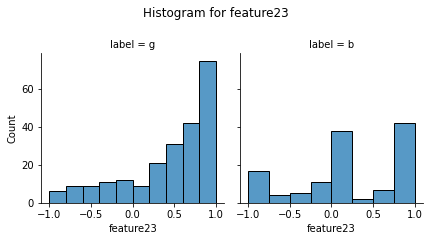

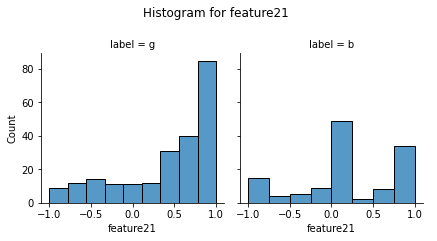

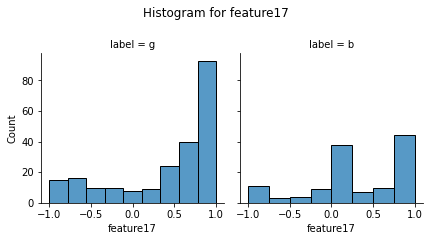

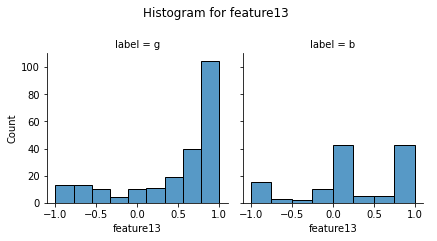

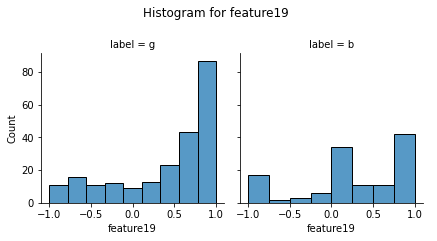

In [35]:
# Hist plot for top 5 vairance
for feature in top5feat[:-1]:
    sns.FacetGrid(iono_plot_df, col="label").map(sns.histplot,feature).add_legend()
    plt.suptitle("Histogram for {}".format(feature), y=1.1)
    plt.savefig("Histogram of {}.png".format(feature), bbox_inches="tight")

C:\Users\Sastha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Sastha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Sastha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Sastha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Sastha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warn

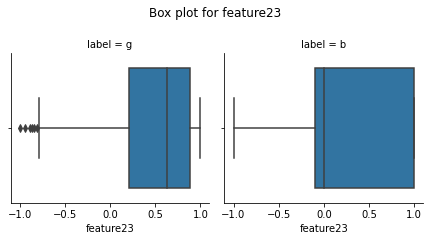

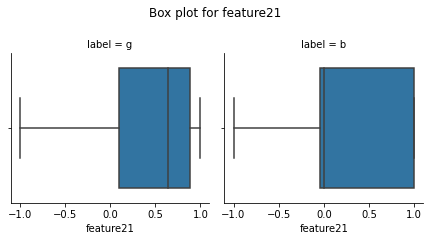

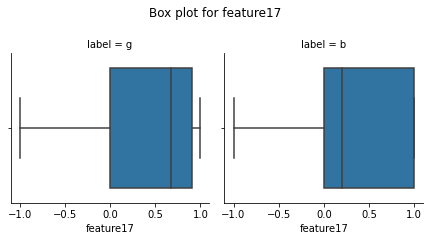

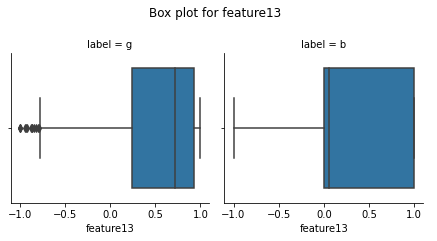

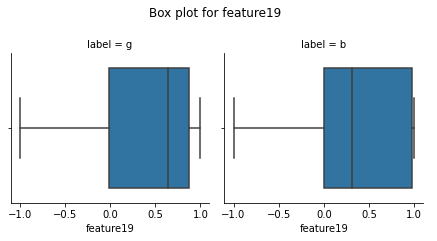

In [36]:
# Box plot for top 5 vairance
for feature in top5feat[:-1]:
    sns.FacetGrid(iono_plot_df, col="label").map(sns.boxplot,feature).add_legend()
    plt.suptitle("Box plot for {}".format(feature), y=1.1)
    plt.savefig("Box plot of {}.png".format(feature), bbox_inches="tight")

In [37]:
# Doing PCA for variance from .9 to 1 in step size of 0.01
vars = [0.9 + i for i in np.arange(0,0.1,0.01)]
for v in vars:
    ipca = PCA(v)
    print("\nPCA variance: {}".format(v))
    x_trainp = x_train
    ipca.fit(x_trainp)
    x_trainp = ipca.transform(x_trainp)
    x_testp = x_test
    x_testp = ipca.transform(x_testp)
    # Implementing the Kfold before logisitc regression
    kf = KFold(n_splits=5)
    kn = 1
    bsLR = 0 # Initialzing the best accuracy score for logisitic regression as 0
    for train_index, test_index in kf.split(x_trainp):
        print("\nKfold Iteration: {}".format(kn))
        # Printing the indices of the training set and validation set
        print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
        X_tr, X_val = x_trainp[train_index], x_trainp[test_index]
        y_tr, y_val = y_train[train_index], y_train[test_index]
        print("Train set:")
        md = model.fit(X_tr, y_tr)
        ylr = model.predict(X_tr)
        a = accuracy_score(y_tr, ylr)
        p = precision_score(y_tr, ylr)
        r = recall_score(y_tr, ylr)
        f1 = f1_score(y_tr, ylr)
        print("Model {}: Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(kn, a, p, r, f1))
        print("Validation set:")
        md = model.fit(X_val, y_val)
        ylr = model.predict(X_val)
        a = accuracy_score(y_val, ylr)
        p = precision_score(y_val, ylr)
        r = recall_score(y_val, ylr)
        f1 = f1_score(y_val, ylr)
        print("Model {}: Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(kn, a, p, r, f1))
        if md.score(X_val, y_val) > bsLR:
            bmdp = md
            calibrator = CalibratedClassifierCV(bmdp, cv='prefit')
            cmodel = calibrator.fit(X_val, y_val)
        kn += 1

# Best model metrics on test set for PCA
ytlrp = bmdp.predict(x_testp)
aPCA = accuracy_score(y_test, ytlrp)
pPCA = precision_score(y_test, ytlrp)
rPCA = recall_score(y_test, ytlrp)
f1PCA = f1_score(y_test, ytlrp)
PCA_probs = cmodel.predict_proba(x_testp)[:, 1]


PCA variance: 0.9

Kfold Iteration: 1
Train: 63 to 314, Validate: 0 to 62
Train set:
Model 1: Accuracy: 0.9444444444444444, Precision: 0.9570552147239264, Recall: 0.9570552147239264, F-1 Score: 0.9570552147239264
Validation set:
Model 1: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 2
Train: 0 to 314, Validate: 63 to 125
Train set:
Model 2: Accuracy: 0.9285714285714286, Precision: 0.95625, Recall: 0.9329268292682927, F-1 Score: 0.9444444444444445
Validation set:
Model 2: Accuracy: 0.9682539682539683, Precision: 0.9523809523809523, Recall: 1.0, F-1 Score: 0.975609756097561

Kfold Iteration: 3
Train: 0 to 314, Validate: 126 to 188
Train set:
Model 3: Accuracy: 0.9642857142857143, Precision: 0.9693251533742331, Recall: 0.9753086419753086, F-1 Score: 0.9723076923076923
Validation set:
Model 3: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 4
Train: 0 to 314, Validate: 189 to 251
Train set:
Model 4: Accuracy: 0.9484126984126984, 

PCA variance: 0.96

Kfold Iteration: 1
Train: 63 to 314, Validate: 0 to 62
Train set:
Model 1: Accuracy: 0.9484126984126984, Precision: 0.96875, Recall: 0.950920245398773, F-1 Score: 0.9597523219814241
Validation set:
Model 1: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 2
Train: 0 to 314, Validate: 63 to 125
Train set:
Model 2: Accuracy: 0.9603174603174603, Precision: 0.963855421686747, Recall: 0.975609756097561, F-1 Score: 0.9696969696969697
Validation set:
Model 2: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 3
Train: 0 to 314, Validate: 126 to 188
Train set:
Model 3: Accuracy: 0.9523809523809523, Precision: 0.9573170731707317, Recall: 0.9691358024691358, F-1 Score: 0.9631901840490797
Validation set:
Model 3: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 4
Train: 0 to 314, Validate: 189 to 251
Train set:
Model 4: Accuracy: 0.9563492063492064, Precision: 0.9585798816568047, Recall: 0.975903

In [38]:
# Implementation of sklearn logisitc regression with l1 and l2 reg - Q.3.1.b
l1lrmod = LogisticRegression(penalty='elasticnet', l1_ratio= 0.01, solver='saga')
# Implementing the Kfold before logisitc regression
kf = KFold(n_splits=5)
kn = 1
bsLR = 0 # Initialzing the best accuracy score for logisitic regression as 0
for train_index, test_index in kf.split(x_train):
    print("\nKfold Iteration: {}".format(kn))
    # Printing the indices of the training set and validation set
    print("Train: {} to {},".format(train_index[0], train_index[-1]), "Validate: {} to {}".format(test_index[0], test_index[-1]))
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    print("Train set:")
    md = l1lrmod.fit(X_tr, y_tr)
    ylr = l1lrmod.predict(X_tr)
    a = accuracy_score(y_tr, ylr)
    p = precision_score(y_tr, ylr)
    r = recall_score(y_tr, ylr)
    f1 = f1_score(y_tr, ylr)
    print("Model {}: Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(kn, a, p, r, f1))
    print("Validation set:")
    md = l1lrmod.fit(X_val, y_val)
    ylr = l1lrmod.predict(X_val)
    a = accuracy_score(y_val, ylr)
    p = precision_score(y_val, ylr)
    r = recall_score(y_val, ylr)
    f1 = f1_score(y_val, ylr)
    print("Model {}: Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(kn, a, p, r, f1))
    if md.score(X_val, y_val) > bsLR:
        bmdl12 = md
        calibrator = CalibratedClassifierCV(bmdl12, cv='prefit')
        cmodel = calibrator.fit(X_val, y_val)
    kn += 1

# Best model metrics on test set for l1l2
ytlrr = bmdl12.predict(x_test)
al1l2 = accuracy_score(y_test, ytlrr)
pl1l2 = precision_score(y_test, ytlrr)
rl1l2 = recall_score(y_test, ytlrr)
f1l1l2 = f1_score(y_test, ytlrr)
l1l2_probs = cmodel.predict_proba(x_test)[:, 1]


Kfold Iteration: 1
Train: 63 to 314, Validate: 0 to 62
Train set:
Model 1: Accuracy: 0.9484126984126984, Precision: 0.9411764705882353, Recall: 0.9815950920245399, F-1 Score: 0.9609609609609611
Validation set:
Model 1: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 2
Train: 0 to 314, Validate: 63 to 125
Train set:
Model 2: Accuracy: 0.9682539682539683, Precision: 0.9588235294117647, Recall: 0.9939024390243902, F-1 Score: 0.9760479041916168
Validation set:
Model 2: Accuracy: 0.9682539682539683, Precision: 0.9523809523809523, Recall: 1.0, F-1 Score: 0.975609756097561

Kfold Iteration: 3
Train: 0 to 314, Validate: 126 to 188
Train set:
Model 3: Accuracy: 0.9603174603174603, Precision: 0.9578313253012049, Recall: 0.9814814814814815, F-1 Score: 0.9695121951219512
Validation set:
Model 3: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F-1 Score: 1.0

Kfold Iteration: 4
Train: 0 to 314, Validate: 189 to 251
Train set:
Model 4: Accuracy: 0.9563492063492064, Precisio

C:\Users\Sastha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Sastha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Sastha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Sastha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Sastha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which

In [39]:
# Comparison of best PCA and non PCA models on test set - Q.3.1.a, Q.3.1.b
print("The evaluation metrics of the best non PCA model on the test set:")
print("Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(aNPCA, pNPCA, rNPCA, f1NPCA))
print("The evaluation metrics of the best PCA model on the test set:")
print("Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(aPCA, pPCA, rPCA, f1PCA))
print("The evaluation metrics of the best l1l2 model on the test set:")
print("Accuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(al1l2, pl1l2, rl1l2, f1l1l2))

The evaluation metrics of the best non PCA model on the test set:
Accuracy: 0.8333333333333334, Precision: 0.8, Recall: 0.9523809523809523, F-1 Score: 0.8695652173913043
The evaluation metrics of the best PCA model on the test set:
Accuracy: 0.8333333333333334, Precision: 0.8260869565217391, Recall: 0.9047619047619048, F-1 Score: 0.8636363636363636
The evaluation metrics of the best l1l2 model on the test set:
Accuracy: 0.8055555555555556, Precision: 0.7692307692307693, Recall: 0.9523809523809523, F-1 Score: 0.8510638297872339


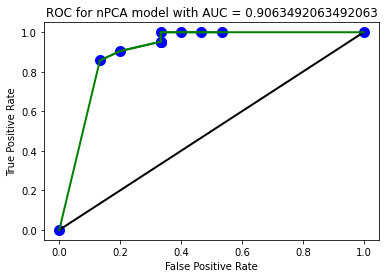

In [40]:
# Implementation of ROC curve for different threshold values of 3 models - Q.3.1.c

def GetRate(thresh, probs, y_test):
    # Calculating True Positivies, True Negatives, False Positives, False Negatives
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(probs)): 
        if(probs[i] >= thresh):
            if(y_test[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(probs[i] < thresh):
            if(y_test[i] == 0):
                tn += 1
            else:
                fn += 1
    # Calculating True Positive rate, False Positive rate
    tpr = tp/ (tp + fn)
    fpr = fp/ (fp + tn)

    return tpr, fpr

# Implementing the roc generation function
def rocG(probs, y_test, th):
    ROC = np.array([])
    for th in thresh:
        tpr, fpr = GetRate(th, probs, y_test)
        ROC = np.append(ROC, [fpr, tpr])
        
    return ROC.reshape(-1, 2)

thresh = [i for i in np.arange(0,1.1,0.1)]

# Plotting the curve for non PCA model
ROC = rocG(nPCA_probs,y_test,thresh)

fprs = []
tprs = []
for i in range(len(ROC)-1):
    xc = ROC[i];
    yc = ROC[i+1]
    tprs.append([xc[0], yc[0]])
    fprs.append([xc[1], yc[1]])

# Finding auc
AUC = sum(np.trapz(tprs,fprs))+1
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.scatter(ROC[:,0],ROC[:,1], c='b', s=100)
plt.plot(tprs,fprs, 'g', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for nPCA model with AUC = {}'.format(AUC))
plt.savefig("ROC_nPCA.png", bbox_inches="tight")

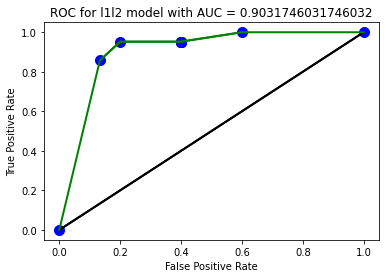

In [41]:
# Plotting the curve for l1l2 model
ROC = rocG(l1l2_probs,y_test,thresh)

fprs = []
tprs = []
for i in range(len(ROC)-1):
    xc = ROC[i];
    yc = ROC[i+1]
    tprs.append([xc[0], yc[0]])
    fprs.append([xc[1], yc[1]])

# Finding auc
AUC = sum(np.trapz(tprs,fprs))+1
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.scatter(ROC[:,0],ROC[:,1], c='b', s=100)
plt.plot(tprs,fprs, 'g', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for l1l2 model with AUC = {}'.format(AUC))
plt.savefig("ROC_l1l2.png", bbox_inches="tight")

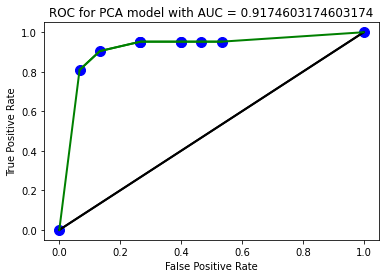

In [42]:
# Plotting the curve for PCA model
ROC = rocG(PCA_probs,y_test,thresh)

fprs = []
tprs = []
for i in range(len(ROC)-1):
    xc = ROC[i];
    yc = ROC[i+1]
    tprs.append([xc[0], yc[0]])
    fprs.append([xc[1], yc[1]])

# Finding auc
AUC = sum(np.trapz(tprs,fprs))+1
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.scatter(ROC[:,0],ROC[:,1], c='b', s=100)
plt.plot(tprs,fprs, 'g', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for PCA model with AUC = {}'.format(AUC))
plt.savefig("ROC_PCA.png", bbox_inches="tight")

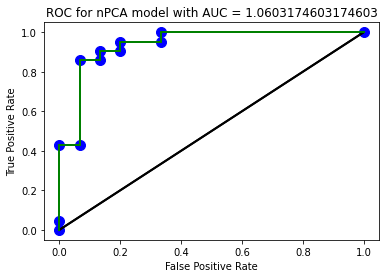

In [43]:
# Implementation of ROC curve for different threshold values of 3 models using sklearn - Q.3.1.d

# Plotting the curve for non PCA model using sklearn roc-auc
fpr, tpr, thresh = roc_curve(y_test, nPCA_probs)
ROC = [[f,t] for f,t in zip(fpr, tpr)]
ROC = np.array(ROC)
AUC = roc_auc_score(y_test, nPCA_probs)
fprs = []
tprs = []
for i in range(len(ROC)-1):
    xc = ROC[i];
    yc = ROC[i+1]
    tprs.append([xc[0], yc[0]])
    fprs.append([xc[1], yc[1]])

# Finding auc
AUC = sum(np.trapz(tprs,fprs))+1
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.scatter(ROC[:,0],ROC[:,1], c='b', s=100)
plt.plot(tprs,fprs, 'g', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for nPCA model with AUC = {}'.format(AUC))
plt.savefig("ROC_nPCA_sk.png", bbox_inches="tight")

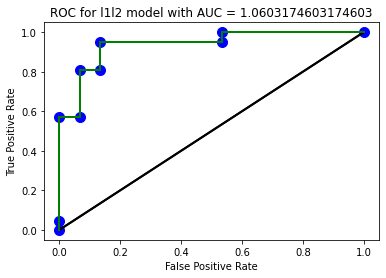

In [44]:
# Plotting the curve for non l1l2 model using sklearn roc-auc
fpr, tpr, thresh = roc_curve(y_test, l1l2_probs)
ROC = [[f,t] for f,t in zip(fpr, tpr)]
ROC = np.array(ROC)
AUC = roc_auc_score(y_test, l1l2_probs)
fprs = []
tprs = []
for i in range(len(ROC)-1):
    xc = ROC[i];
    yc = ROC[i+1]
    tprs.append([xc[0], yc[0]])
    fprs.append([xc[1], yc[1]])

# Finding auc
AUC = sum(np.trapz(tprs,fprs))+1
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.scatter(ROC[:,0],ROC[:,1], c='b', s=100)
plt.plot(tprs,fprs, 'g', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for l1l2 model with AUC = {}'.format(AUC))
plt.savefig("ROC_l1l2_sk.png", bbox_inches="tight")

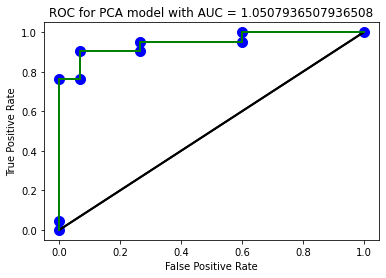

In [45]:
# Plotting the curve for PCA model using sklearn roc-auc
fpr, tpr, thresh = roc_curve(y_test, PCA_probs)
ROC = [[f,t] for f,t in zip(fpr, tpr)]
ROC = np.array(ROC)
AUC = roc_auc_score(y_test, PCA_probs)
fprs = []
tprs = []
for i in range(len(ROC)-1):
    xc = ROC[i];
    yc = ROC[i+1]
    tprs.append([xc[0], yc[0]])
    fprs.append([xc[1], yc[1]])

# Finding auc
AUC = sum(np.trapz(tprs,fprs))+1
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.scatter(ROC[:,0],ROC[:,1], c='b', s=100)
plt.plot(tprs,fprs, 'g', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for PCA model with AUC = {}'.format(AUC))
plt.savefig("ROC_PCA_sk.png", bbox_inches="tight")

Comparing the sets of each model, it can be seen that the true positive rates and false positive rates take sharper jumps in the sklearn model compared to the "from the scratch" implementation. It is based on the choice of thresholds.

In [46]:
# Implementation of Multiclass Logistic regression of the MNIST dataset Q.3.2.a.
X_train = mnist_train_df[pixels].values
y_train = mnist_train_labels
X_test = mnist_test_df[pixels].values
y_test = mnist_test_labels
ovon = OneVsOneClassifier(SGDClassifier(penalty=None, max_iter=100, learning_rate='optimal', n_jobs=-1), n_jobs=-1)
ovon = ovon.fit(X_train, y_train)
ytovon = ovon.predict(X_test)
ovol2 = OneVsOneClassifier(LogisticRegression(n_jobs=-1), n_jobs=-1)
ovol2 = ovol2.fit(X_train, y_train)
ytovol2 = ovol2.predict(X_test)

In [47]:
# Accuracy, Precision, Recall and F-1 score for simple Logistic Regression OVO
a = accuracy_score(y_test, ytovon)
p = precision_score(y_test, ytovon, average='micro')
r = recall_score(y_test, ytovon, average='micro')
f1 = f1_score(y_test, ytovon, average='micro')
print("simple Logistic Regression OVO:\nAccuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(a, p, r, f1))

simple Logistic Regression OVO:
Accuracy: 0.9306, Precision: 0.9306, Recall: 0.9306, F-1 Score: 0.9306


In [48]:
# Accuracy, Precision, Recall and F-1 score for l2 Logistic Regression OVO
a = accuracy_score(y_test, ytovol2)
p = precision_score(y_test, ytovol2, average='micro')
r = recall_score(y_test, ytovol2, average='micro')
f1 = f1_score(y_test, ytovol2, average='micro')
print("l2 Logistic Regression OVO: \nAccuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(a, p, r, f1))

l2 Logistic Regression OVO: 
Accuracy: 0.9278, Precision: 0.9278, Recall: 0.9278, F-1 Score: 0.9278


In [49]:
ovr = OneVsRestClassifier(LogisticRegression(max_iter=100,n_jobs=-1),n_jobs=-1)
ovr = ovr.fit(X_train, y_train)
ytovr = ovr.predict(X_test)

In [50]:
# Accuracy, Precision, Recall and F-1 score for l2 Logistic Regression OVR
a = accuracy_score(y_test, ytovr)
p = precision_score(y_test, ytovr, average='micro')
r = recall_score(y_test, ytovr, average='micro')
f1 = f1_score(y_test, ytovr, average='micro')
print("Logistic Regression OVR:\nAccuracy: {}, Precision: {}, Recall: {}, F-1 Score: {}".format(a, p, r, f1))

Logistic Regression OVR:
Accuracy: 0.9178, Precision: 0.9178, Recall: 0.9178, F-1 Score: 0.9178
